In [8]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import graphviz
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder

data_raw = pd.read_csv('./csvfiles/통신고객이탈.csv')

data = data_raw.copy()

data.tail(10)

z = {'Active':1, 'Churned':0}
data['CHURN']=data['CHURN'].map(z)

data.head()

gender = {'M':1, 'F':0}
data["GENDER"] = data["GENDER"].map(gender)

data.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,1,K102990,0,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,1,K103280,1,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,1,K103660,1,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,1,K103730,1,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,1,K104560,0,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [2]:
object_cols = data.select_dtypes(include=['object']).columns.tolist()

object_cols

from sklearn.preprocessing import LabelEncoder
def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:

        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(object_cols, data)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
CHURN                 930 non-null int64
CUSTOMER_ID           930 non-null int64
GENDER                930 non-null int64
AGE                   930 non-null int64
CHARGE_TYPE           930 non-null int64
HANDSET               930 non-null int64
USAGE_BAND            930 non-null int64
SERVICE_DURATION      930 non-null float64
DROPPED_CALLS         930 non-null int64
PEAK_CALLS_NO         930 non-null int64
PEAK_CALLS_TIME       930 non-null float64
WEEKEND_CALLS_NO      930 non-null int64
WEEKEND_CALLS_TIME    930 non-null float64
TOTAL_CALLS_NO        930 non-null int64
TOTAL_CALLS_TIME      930 non-null float64
dtypes: float64(4), int64(11)
memory usage: 109.1 KB


In [3]:
from sklearn.model_selection import train_test_split

y = data["CHURN"]
x = data.drop(["CHURN",'CUSTOMER_ID'], axis = 1)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)
print("train data X size:", train_x.shape)
print("train data y size:", train_y.shape)
print("test data X size:", test_x.shape)
print("test data y size:", test_y.shape)


train data X size: (651, 13)
train data y size: (651,)
test data X size: (279, 13)
test data y size: (279,)


In [5]:
train_x_scaled = scale(train_x, axis = 0)
test_x_scaled = scale(test_x, axis = 0)

/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [13]:
# 새로운 scv 모형 생성
svm_uncustomized_scaled = SVC(random_state=1234)
svm_uncustomized_scaled.fit(train_x_scaled,train_y)
# train 데이터 셋 정확도
print("Accuracy on test set : {:.3f}".format(svm_uncustomized_scaled.score(test_x_scaled,test_y)))


Accuracy on training set : 0.828


In [16]:
#train 및 test정확도 결과 저장용
train_accuracy = []
test_accuracy = []
para_C = []
# C를 0.1부터 1까지 0.1단위로 조정
for i in range(15):
    svm1 = SVC(C=(i+1)/10, random_state=1234)
    svm1.fit(train_x_scaled, train_y)
    para_C.append((i+1)/10)
    train_accuracy.append(svm1.score(train_x_scaled, train_y))
    test_accuracy.append(svm1.score(test_x_scaled, test_y))
    
#저장된 모델의 criterion 및 train/test 데이터 분류 정확도 테이블 생성

ds_accuracy1 = pd.DataFrame()
ds_accuracy1["C"] = para_C
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy
ds_accuracy1.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.800,0.821
1,0.2,0.800,0.821
2,0.3,0.800,0.821
3,0.4,0.800,0.821
4,0.5,0.800,0.821
5,0.6,0.802,0.821
6,0.7,0.806,0.821
7,0.8,0.816,0.821
8,0.9,0.819,0.824
9,1.0,0.820,0.828


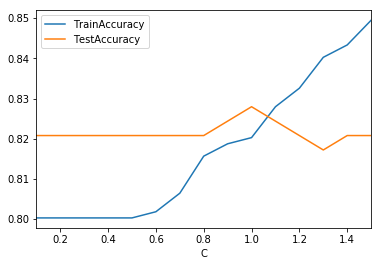

In [17]:
ds_accuracy1.set_index("C").plot.line()

# C를 1로 해야 test 적중률이 젤 높다